## Introduction ##

This notebook will be taking a look on the Cheltenham Crime Data Notebook.  Does the time or day matter when it comes to crime.  Do certain types of crime happen at certain hours?

In [4]:
# This portion of code is boilerplate from the Cheltenham Crime Data Notebook
# This is a simple dataset.  
# When reading in the data, the only area that may requires 
# special attention is the date format.  You may want to use %m/%d/%Y %I:%M:00 %p format.
import pandas as pd
import numpy as np
import scipy as sci
import datetime


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


dateparse = lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:00 %p')

# Read data 
d=pd.read_csv("crime.csv",parse_dates=['incident_datetime'],date_parser=dateparse)
d
# Display data that we retrieve from the CSV file

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,2012-02-10 10:46:00,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,NaN,600 Block TOOKANY CREEK PKWY,NaN,CHELTENHAM,PA,19012,null,40.068875,-75.121003,02/21/2012 03:15:04 PM,02/21/2012 03:15:06 PM,POINT (-75.121003 40.068875),10,Friday,Theft from Vehicle
1,100068328,12-02654,2012-02-11 22:14:00,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,NaN,200 Block BICKLEY RD,NaN,WYNCOTE,PA,19038,null,40.097921,-75.154642,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.154642 40.097921),22,Saturday,Traffic
2,100068329,12-02598,2012-02-10 17:51:00,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,NaN,2400 Block SHOPPERS LN,NaN,WYNCOTE,PA,19095,null,40.076851,-75.154990,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.15499 40.076851),17,Friday,Theft
3,100068331,12-02535,2012-02-09 22:18:00,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,NaN,600 Block MEETINGHOUSE RD,NaN,ELKINS PARK,PA,null,null,40.085155,-75.124921,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.124921 40.085155),22,Thursday,Breaking & Entering
4,100068332,12-02556,2012-02-10 11:19:00,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,NaN,1 Block LIMEKILN TPK,NaN,GLENSIDE,PA,19038,null,40.106723,-75.163022,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.163022 40.106723),11,Friday,Theft
5,100068334,12-02478,2012-02-08 18:16:00,[CTPD]-THEFT - $50 TO $200 - BICYCLES,THEFT - $50 TO $200 - BICYCLES,NaN,400 Block CENTRAL AVE,NaN,CHELTENHAM,PA,19012,null,40.062219,-75.093490,02/21/2012 03:15:04 PM,02/21/2012 03:15:08 PM,POINT (-75.093489 40.062219),18,Wednesday,Theft
6,100068335,12-02734,2012-02-13 08:47:00,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,NaN,1 Block OLD CEDARBROOK RD,NaN,WYNCOTE,PA,null,null,40.094555,-75.148786,02/21/2012 03:15:04 PM,02/21/2012 09:55:13 PM,POINT (-75.148786 40.094555),8,Monday,Property Crime
7,100068336,12-02614,2012-02-10 22:35:00,[CTPD]-DISORDERLY CONDUCT,DISORDERLY CONDUCT,NaN,2000 Block B SOUTH JOHN RUSSELL CIR,NaN,ELKINS PARK,PA,null,null,40.071263,-75.146525,02/21/2012 03:15:04 PM,02/21/2012 03:15:09 PM,POINT (-75.146525 40.071263),22,Friday,Disorder
8,100068337,12-02656,2012-02-11 22:36:00,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,NaN,500 Block HASBROOK AVE,NaN,CHELTENHAM,PA,19012,null,40.058303,-75.092725,02/21/2012 03:15:04 PM,02/21/2012 03:15:09 PM,POINT (-75.092725 40.058303),22,Saturday,Property Crime
9,100068338,12-02460,2012-02-08 13:40:00,[CTPD]-DISORDERLY CONDUCT,DISORDERLY CONDUCT,NaN,1000 Block S EASTON RD,NaN,WYNCOTE,PA,19095,null,40.082570,-75.167770,02/21/2012 03:15:04 PM,02/21/2012 03:15:09 PM,POINT (-75.16777 40.08257),13,Wednesday,Disorder


Does day of the week matter when it comes to crime?

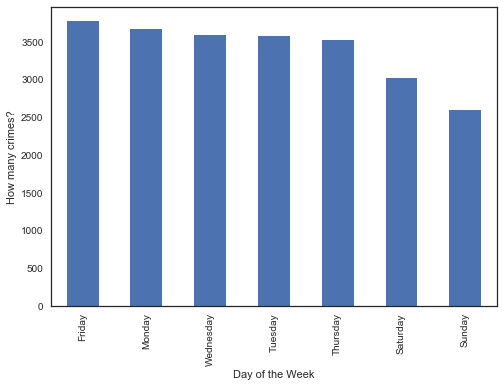

In [5]:
days_of_the_week=pd.value_counts(d['day_of_week'])
days_of_the_week.plot(kind="bar")
_=plt.xlabel('Day of the Week')
_=plt.ylabel('How many crimes?')
plt.show()

Criminals are TGIFing all over the place!

Does the time of day matter when it comes to crime?

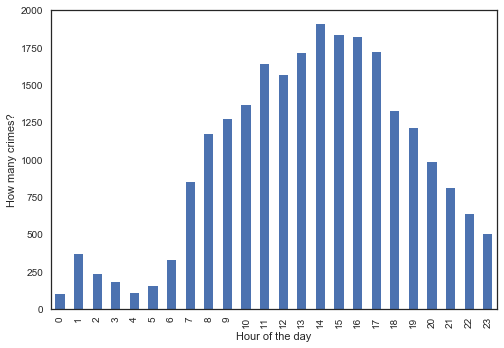

In [6]:
time_of_day=pd.value_counts(d['hour_of_day'], sort=False)
time_of_day.sort_index(inplace=True)
time_of_day.plot(kind='bar')
_=plt.xlabel('Hour of the day')
_=plt.ylabel('How many crimes?')
plt.show()

Crime doesn't stay up late?

Since traffic crime is the most prevalent, lets remove that from the dataset and see if the days of the week charts and time of day charts look any different

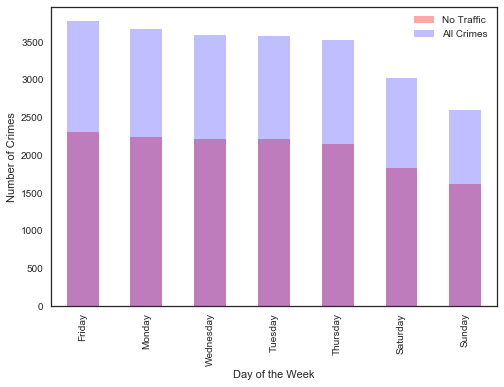

In [7]:
no_traffic=d.loc[d['parent_incident_type']!='Traffic']
days_of_the_week_2=pd.value_counts(no_traffic['day_of_week'])
_=days_of_the_week_2.plot(kind="bar", color='red', alpha=.35)
_=days_of_the_week.plot(kind='bar', color='blue', alpha=.25)
_=plt.xlabel('Day of the Week')
_=plt.ylabel('Number of Crimes')
_=plt.legend(['No Traffic', 'All Crimes'])
plt.show()

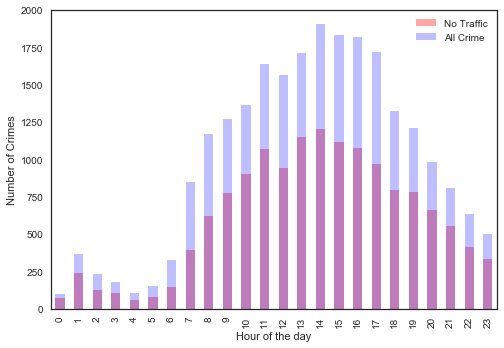

In [8]:
time_of_day_2=pd.value_counts(no_traffic['hour_of_day'], sort=False)
time_of_day_2.sort_index(inplace=True)
_=time_of_day_2.plot(kind='bar', color='red', alpha=.35)
_=time_of_day.plot(kind='bar', color='blue', alpha=.25)
_=plt.xlabel('Hour of the day')
_=plt.ylabel('Number of Crimes')
_=plt.legend(['No Traffic', 'All Crime'])
plt.show()

Interestingly, the shape of the time of day chart looks almost the same!

Let's start breaking down the crime by the time of day.  Do we notice any immediate patterns?

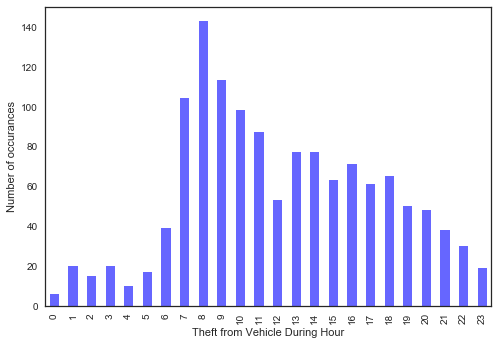

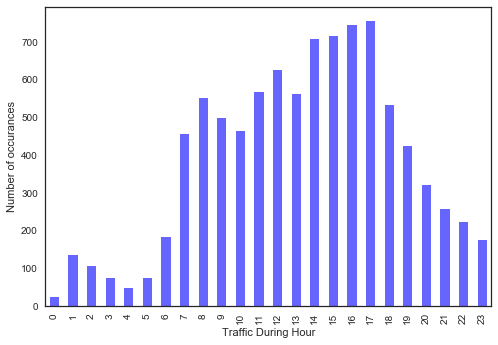

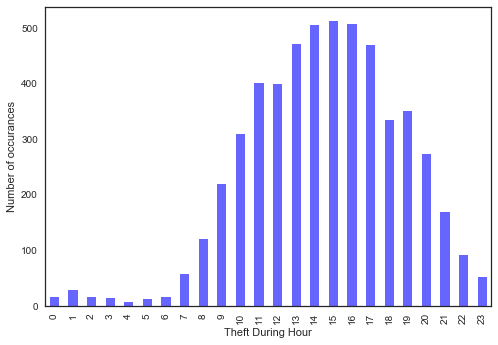

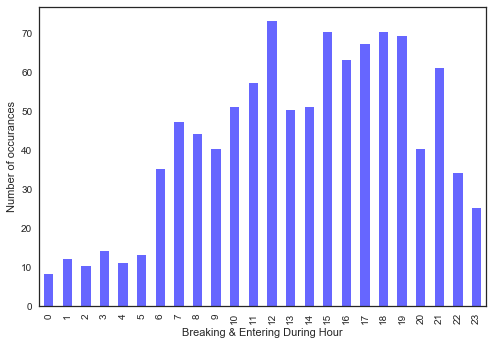

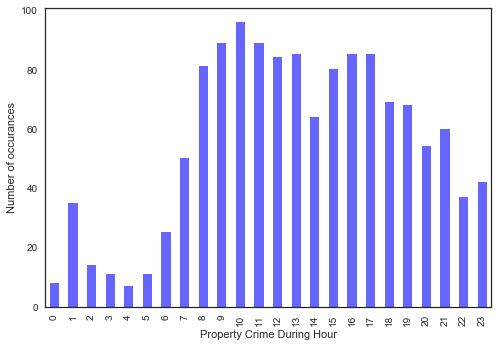

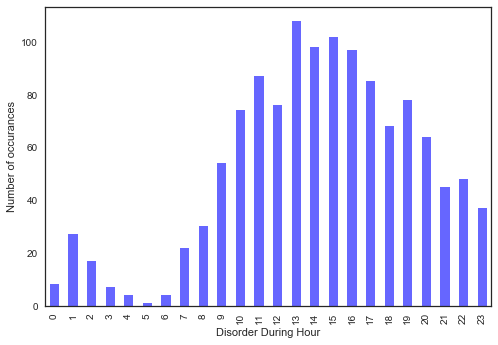

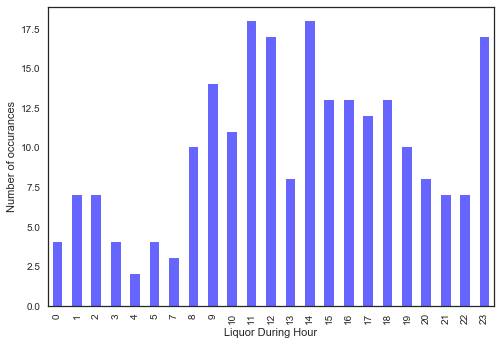

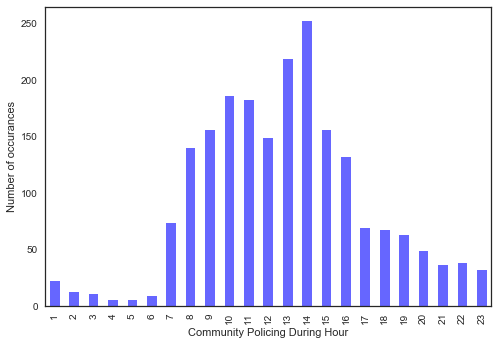

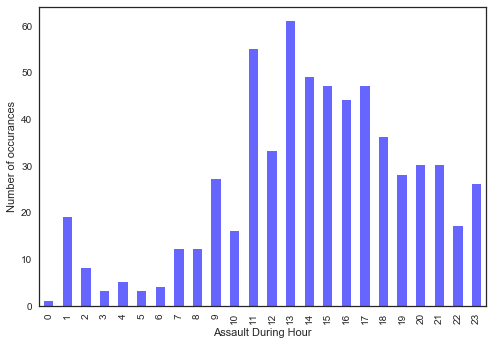

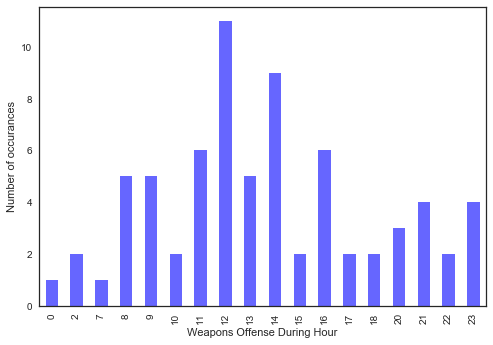

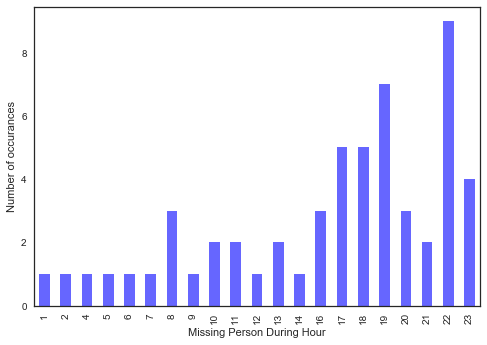

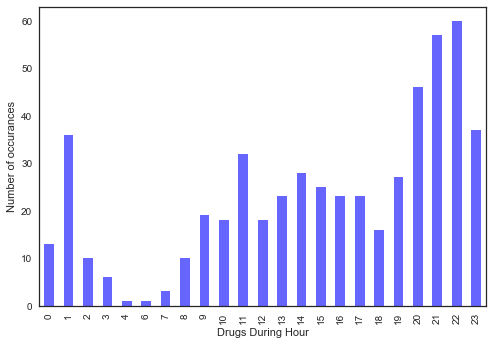

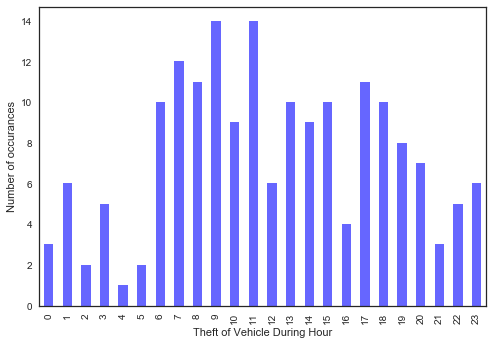

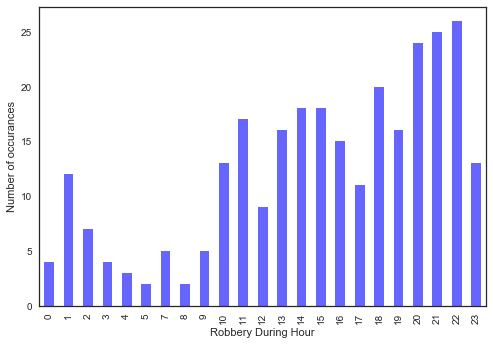

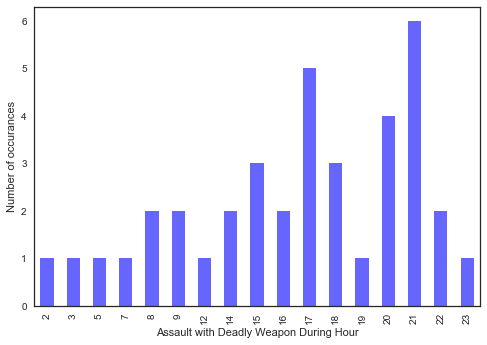

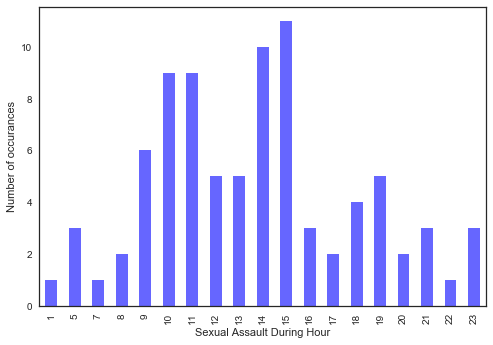

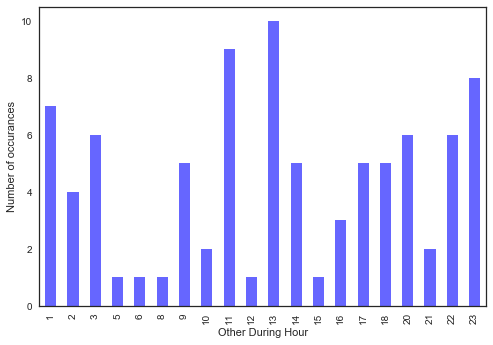

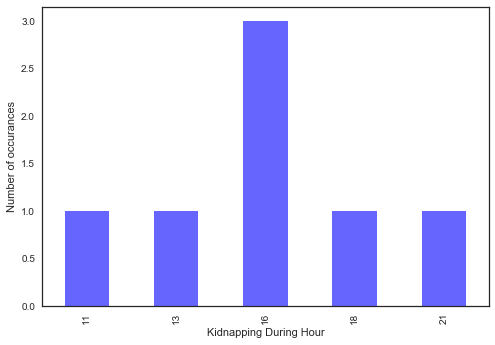

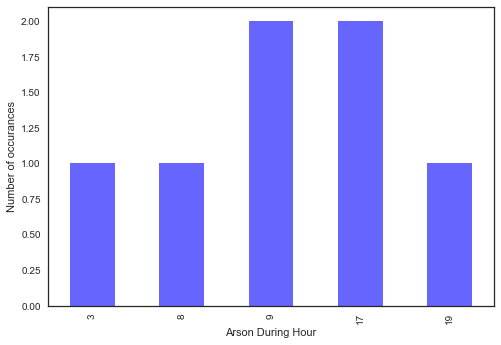

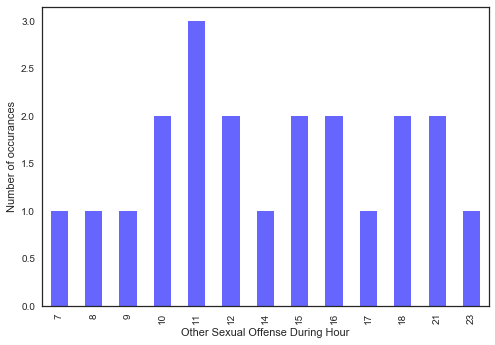

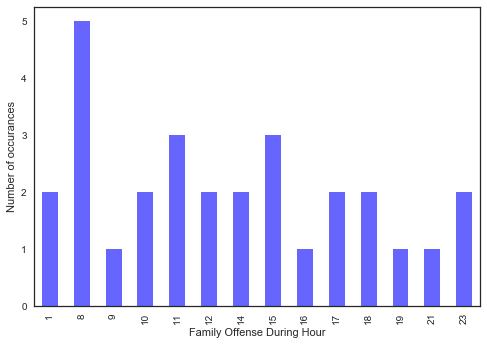

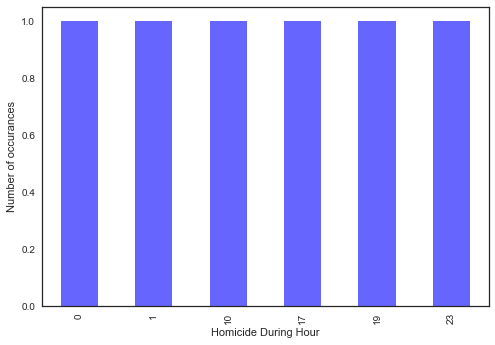

In [9]:
crime_list=d['parent_incident_type'].unique()
for i in range(len(crime_list)):
    temp_crime=d.loc[d['parent_incident_type']==crime_list[i]]
    time_crime=pd.value_counts(temp_crime['hour_of_day'])
    time_crime.sort_index(inplace=True)
    time_crime.plot(kind='bar', color='blue', alpha=.6)
    plt.xlabel(crime_list[i] + ' During Hour')
    plt.ylabel('Number of occurances')
    plt.show()
    plt.figure()
    

Early afternoon until midnight seems like a busy time for the police

What are the bad parts of town, how much do they contribute to the overall crime level?

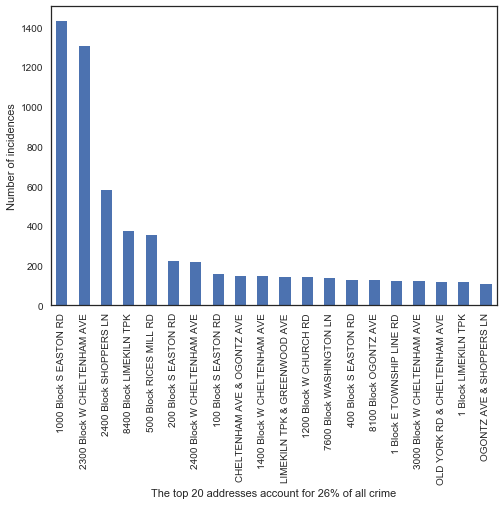

In [10]:
addresses=pd.value_counts(d['address_1'], sort=True)
top_20_add=addresses[0:20]
top_20_add.plot(kind='bar')
_=plt.xlabel('The top 20 addresses account for ' + str(int(100*np.sum(top_20_add)/len(d))) + '% of all crime')
_=plt.ylabel('Number of incidences')
plt.show()

How much of the chart above is just traffic?



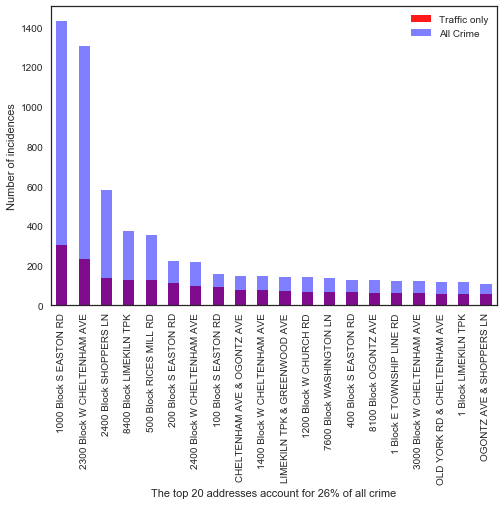

In [11]:
addresses=pd.value_counts(d['address_1'], sort=True)
top_20_add=addresses[0:20]
address_traffic=d.loc[d['parent_incident_type']=='Traffic']
address_traffic_count=pd.value_counts(address_traffic['address_1'], sort=True)
top_20_add_traffic=address_traffic_count[0:20]
top_20_add_traffic.plot(kind='bar', color='red', alpha=.9)
top_20_add.plot(kind='bar', color='blue', alpha=.50)
_=plt.xlabel('The top 20 addresses account for ' + str(int(100*np.sum(top_20_add)/len(d))) + '% of all crime')
_=plt.ylabel('Number of incidences')
_=plt.legend(['Traffic only', 'All Crime'])
plt.show()

Looks like the majority of crime at those top 20 addresses are not Traffic related

In [12]:
d['parent_incident_type'].unique()

array(['Theft from Vehicle', 'Traffic', 'Theft', 'Breaking & Entering',
       'Property Crime', 'Disorder', 'Liquor', 'Community Policing',
       'Assault', 'Weapons Offense', 'Missing Person', 'Drugs',
       'Theft of Vehicle', 'Robbery', 'Assault with Deadly Weapon',
       'Sexual Assault', 'Other', 'Kidnapping', 'Arson',
       'Other Sexual Offense', 'Family Offense', 'Homicide'], dtype=object)